## 라이브러리 로드

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import FinanceDataReader as fdr

## 삼성전자 일별시세 불러오기

In [2]:
df = fdr.DataReader("005930", "2020", "2021")
df.shape

(248, 6)

In [3]:
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921


## Shift 를 활용해 전일 대비 수익률 구하기 
### Change 값 직접 구해보기

In [4]:
df["Change2"] =  df["Close"] / df["Close"].shift(1) - 1

In [5]:
# 불러온 값과 직접 구한 값이 같은지 확인하기
df[["Change", "Change2"]].head()

,Change,Change2
Date,,
2020-01-02,-0.010753,NaN
2020-01-03,0.005435,0.005435
2020-01-06,0.000000,0.000000
2020-01-07,0.005405,0.005405
2020-01-08,0.017921,0.017921


### pct_change 값 직접 구하기

In [6]:
df["pct_change"] = df["Close"].pct_change()
df.head()

,Open,High,Low,Close,Volume,Change,Change2,pct_change
Date,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,0.005435,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000,0.000000,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405,0.005405,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921,0.017921,0.017921


In [7]:
# Diff 값 구하기
df["Diff"] = df["Close"].diff()

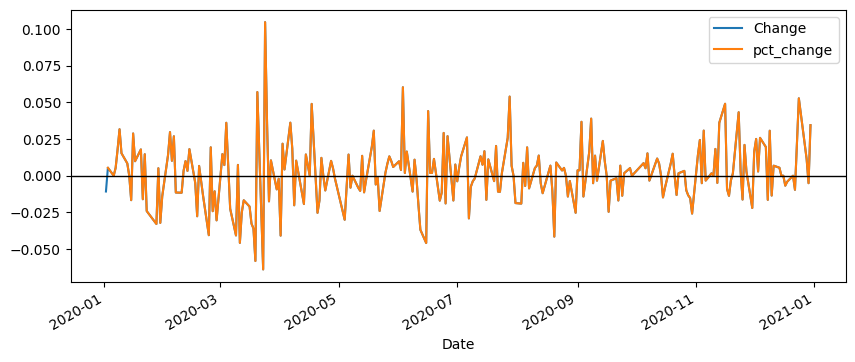

In [8]:
df[["Change", "pct_change"]].plot(figsize=(10, 4))
plt.axhline(0, c="k", lw=1)

## diff 를 통한 증감 구하기

In [9]:
# 이전 데이터와 다음 데이터의 차이를 구합니다.
df["Close"].diff()

Date
2020-01-02       NaN
2020-01-03     300.0
2020-01-06       0.0
2020-01-07     300.0
2020-01-08    1000.0
               ...  
2020-12-23    1600.0
2020-12-24    3900.0
2020-12-28     900.0
2020-12-29    -400.0
2020-12-30    2700.0
Name: Close, Length: 248, dtype: float64

In [10]:
# shift로 diff 구하기
# 종가 - 전일종가
df["Diff_Shift"] = df["Close"] - df["Close"].shift(1)
df

,Open,High,Low,Close,Volume,Change,Change2,pct_change,Diff,Diff_Shift
Date,,,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN,NaN,NaN,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,0.005435,0.005435,300.0,300.0
2020-01-06,54900,55600,54600,55500,10278951,0.000000,0.000000,0.000000,0.0,0.0
2020-01-07,55700,56400,55600,55800,10009778,0.005405,0.005405,0.005405,300.0,300.0
2020-01-08,56200,57400,55900,56800,23501171,0.017921,0.017921,0.017921,1000.0,1000.0
...,...,...,...,...,...,...,...,...,...,...
2020-12-23,72400,74000,72300,73900,19411326,0.022130,0.022130,0.022130,1600.0,1600.0
2020-12-24,74100,78800,74000,77800,32502870,0.052774,0.052774,0.052774,3900.0,3900.0
2020-12-28,79000,80100,78200,78700,40085044,0.011568,0.011568,0.011568,900.0,900.0


## 누적 수익률


In [11]:
# Change = ( 종가 / 전일종가 ) - 1
df["Change"] + 1

Date
2020-01-02    0.989247
2020-01-03    1.005435
2020-01-06    1.000000
2020-01-07    1.005405
2020-01-08    1.017921
                ...   
2020-12-23    1.022130
2020-12-24    1.052774
2020-12-28    1.011568
2020-12-29    0.994917
2020-12-30    1.034483
Name: Change, Length: 248, dtype: float64

In [12]:
0.9 * 1.2 * 2.0 * 0.5

1.08

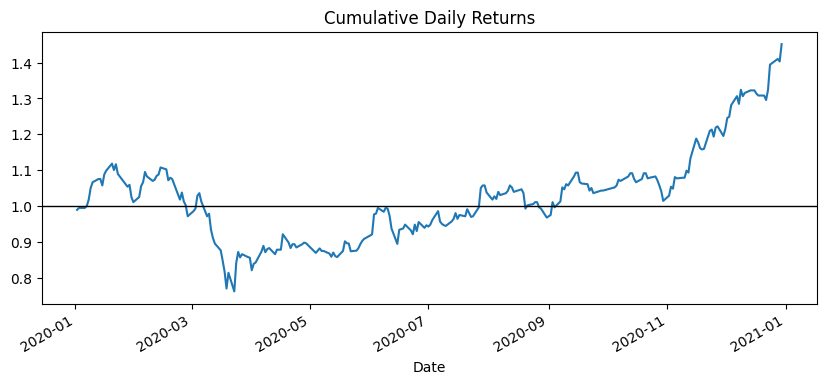

In [13]:
# cumulative Daily Returns 일별 수익률을 누적곱으로 구하기
cum_daily_return =  (df["Change"] + 1).cumprod()
cum_daily_return.plot(figsize=(10, 4), title="Cumulative Daily Returns")
plt.axhline(1, c="k", lw=1)

### 단순이동평균(SMA: Simple Moving Average)
* rolling을 사용합니다.

In [14]:
# 윈도우 7, 14 단순 이동평균 구하기
df["SMA7"] = df["Close"].rolling(7).mean()
df["SMA14"] = df["Close"].rolling(14).mean()

<Axes: title={'center': 'Simple Moving Average'}, xlabel='Date'>

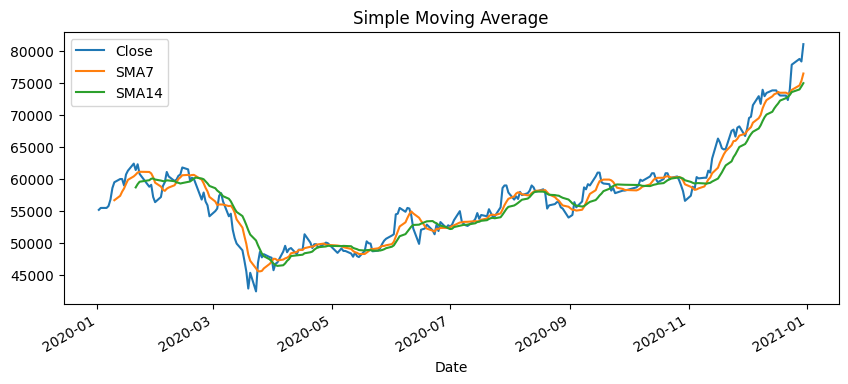

In [15]:
# "Close", "SMA7", "SMA14" 시각화 하기
df[["Close", "SMA7", "SMA14"]].plot(figsize=(10, 4), title="Simple Moving Average")

### 누적이동평균(Cumulative moving average)
* expanding을 사용합니다. window 창이 시간의 흐름에 따라 증가합니다.

In [16]:
# expanding 을 사용하면 window가 시간의 흐름에 따라 증가합니다.
df["CMA"] = df["Close"].expanding(14).mean()

<Axes: title={'center': 'Cumulative moving average'}, xlabel='Date'>

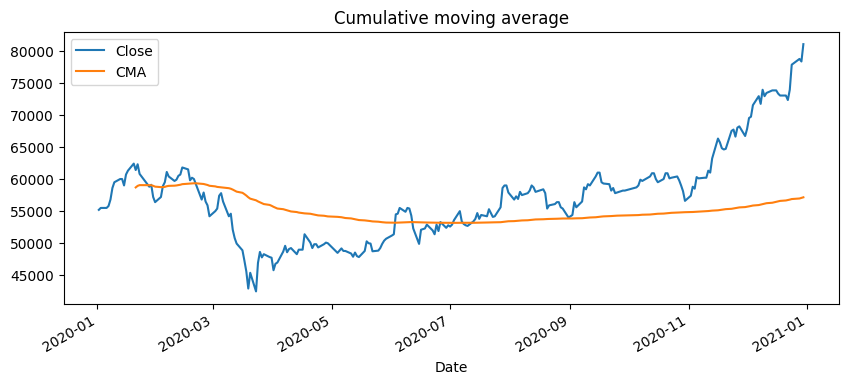

In [17]:
# 누적이동평균 시각화
df[["Close", "CMA"]].plot(figsize=(10,4), title="Cumulative moving average")

### 지수이동평균(Exponential Moving Average)
* 최근 자료에 가중치를 부여하여 최근 가격 변동을 잘 나타냅니다.

In [18]:
# 최근 자료에 가중치를 더 주도록 지수 이동 평균을 구합니다.
# exponential weighted moving
df["EWM_short"] = df["Close"].ewm(span=12).mean()
df["EWM_long"] = df["Close"].ewm(span=26).mean()

<Axes: title={'center': 'Exponential Moving Average'}, xlabel='Date'>

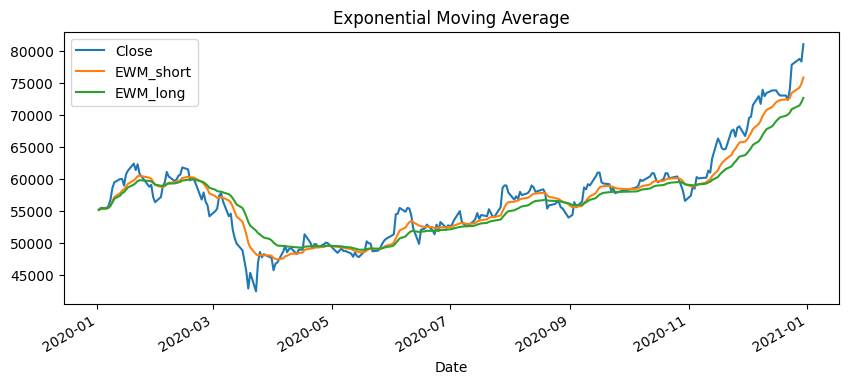

In [19]:
# "Close", "EWM_short", "EWM_long" 시각화
df[["Close", "EWM_short", "EWM_long"]].plot(figsize=(10, 4), 
                                            title="Exponential Moving Average")

<Axes: xlabel='Date'>

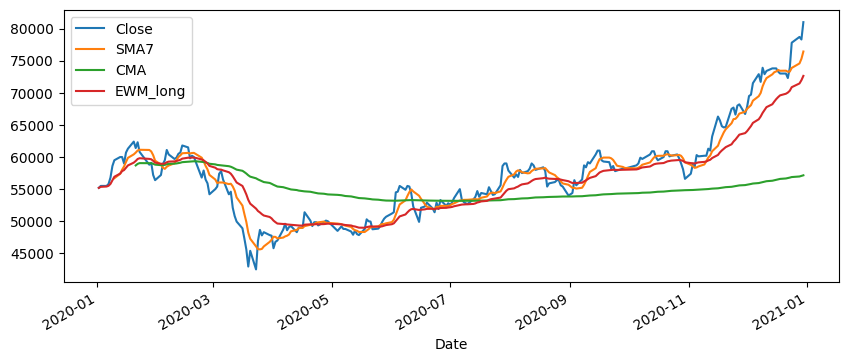

In [20]:
# 다양한 이동평균 비교하기
df[["Close", "SMA7", "CMA", "EWM_long"]].plot(figsize=(10, 4))

## 샘플링
### asfreq
* Convert TimeSeries to specified frequency.

* asfreq : 특정 주기 데이터를 반환
* resample : 특정 주기의 그룹화된 데이터를 반환

In [21]:
# 인덱스의 데이터 타입이 datetime 형태라면 asfreq, resample을 통해 
# 특정 기간만큼 샘플링 혹은 추출을 할 수 있습니다.
df["Close"]

Date
2020-01-02    55200
2020-01-03    55500
2020-01-06    55500
2020-01-07    55800
2020-01-08    56800
              ...  
2020-12-23    73900
2020-12-24    77800
2020-12-28    78700
2020-12-29    78300
2020-12-30    81000
Name: Close, Length: 248, dtype: int64

In [22]:
# asfreq : D단위로 샘플링

df["Close"].asfreq("D")

Date
2020-01-02    55200.0
2020-01-03    55500.0
2020-01-04        NaN
2020-01-05        NaN
2020-01-06    55500.0
               ...   
2020-12-26        NaN
2020-12-27        NaN
2020-12-28    78700.0
2020-12-29    78300.0
2020-12-30    81000.0
Freq: D, Name: Close, Length: 364, dtype: float64

In [23]:
# 일 단위로 샘플링을 하면 영업일이 아닌 데이터들이 결측치(NaN)로 되어 있습니다.
# fillna를 통해 method="ffill" 로 채우면 이전 영업일 데이터로 값을 채울 수 있습니다.

df["Close"].asfreq("D").fillna(method="ffill")

/var/folders/cn/3xfx7dqx4zx7lmdpfl0jh9g80000gn/T/ipykernel_4754/1762472234.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Close"].asfreq("D").fillna(method="ffill")


Date
2020-01-02    55200.0
2020-01-03    55500.0
2020-01-04    55500.0
2020-01-05    55500.0
2020-01-06    55500.0
               ...   
2020-12-26    77800.0
2020-12-27    77800.0
2020-12-28    78700.0
2020-12-29    78300.0
2020-12-30    81000.0
Freq: D, Name: Close, Length: 364, dtype: float64

In [24]:
# df.interpolate?

In [25]:
# df["Close"].asfreq("D").interpolate()

In [26]:
# 특정 주기 단위로 샘플링 예) 4일
df["Close"].asfreq("4D")

Date
2020-01-02    55200.0
2020-01-06    55500.0
2020-01-10    59500.0
2020-01-14    60000.0
2020-01-18        NaN
               ...   
2020-12-11    73400.0
2020-12-15    73800.0
2020-12-19        NaN
2020-12-23    73900.0
2020-12-27        NaN
Freq: 4D, Name: Close, Length: 91, dtype: float64

In [27]:
# 특정 주기 단위로 샘플링 예) 월단위
df["Close"].asfreq("M")

Date
2020-01-31    56400.0
2020-02-29        NaN
2020-03-31    47750.0
2020-04-30        NaN
2020-05-31        NaN
2020-06-30    52800.0
2020-07-31    57900.0
2020-08-31    54000.0
2020-09-30        NaN
2020-10-31        NaN
2020-11-30    66700.0
Freq: M, Name: Close, dtype: float64

In [28]:
# 특정 주기 단위로 샘플링 예) 분기단위
df["Close"].asfreq("Q")

Date
2020-03-31    47750.0
2020-06-30    52800.0
2020-09-30        NaN
Freq: Q-DEC, Name: Close, dtype: float64

### resample
* Resample time-series data.

In [29]:
# 일간 평균 구하기
df["Close"].resample("D").mean()

Date
2020-01-02    55200.0
2020-01-03    55500.0
2020-01-04        NaN
2020-01-05        NaN
2020-01-06    55500.0
               ...   
2020-12-26        NaN
2020-12-27        NaN
2020-12-28    78700.0
2020-12-29    78300.0
2020-12-30    81000.0
Freq: D, Name: Close, Length: 364, dtype: float64

In [30]:
# 월간 평균 구하기
df["Close"].resample("M").mean()

Date
2020-01-31    58815.000000
2020-02-29    59085.000000
2020-03-31    50168.181818
2020-04-30    49045.000000
2020-05-31    49100.000000
2020-06-30    52986.363636
2020-07-31    54726.086957
2020-08-31    56980.000000
2020-09-30    58176.190476
2020-10-31    59736.842105
2020-11-30    63419.047619
2020-12-31    73619.047619
Freq: M, Name: Close, dtype: float64

<Axes: xlabel='Date'>

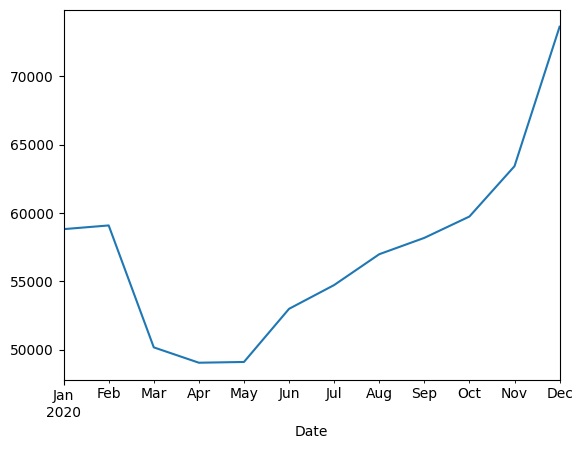

In [31]:
# 월간 평균 시각화
df["Close"].resample("M").mean().plot()

<Axes: xlabel='Date'>

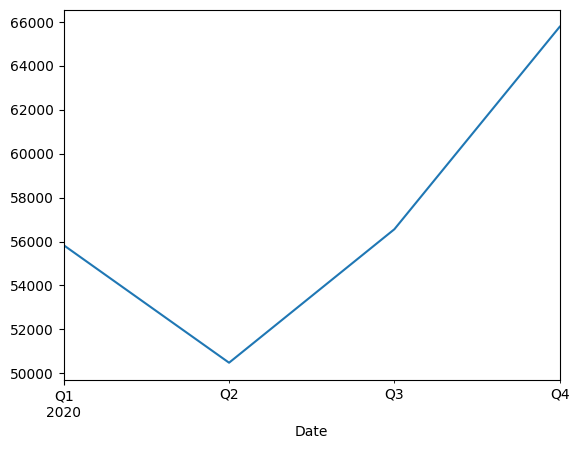

In [32]:
# 분기별 평균 구하기

df["Close"].resample("Q").mean().plot()

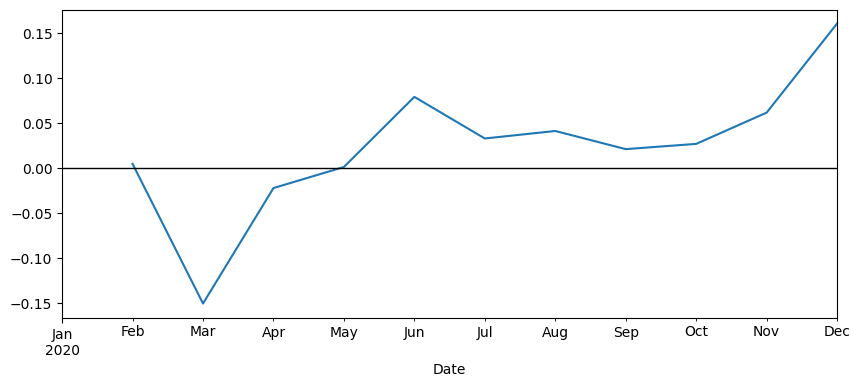

In [33]:
# 월별 평균 종가로 수익률 구하기
month_change =  df["Close"].resample("M").mean().pct_change()
month_change.plot(figsize=(10, 4))
plt.axhline(0, c="k", lw=1)